In [1]:
%config InlineBackend.figure_format = "retina"

from matplotlib import pyplot as plt
import numpy as np

from spamm.run_spamm import spamm
from spamm.analysis import plot_best_models
from spamm.Samples import Samples
import corner

In [2]:
def powerlaw(x, x0, amplitude, alpha):
    return amplitude * (x/x0)**alpha

In [3]:
# Define the unit-less wavelength and flux
wave = np.arange(1000., 4000.)

# Just generate a simple sample power law for a spectrum
flux = powerlaw(wave, np.median(wave), 1e-17, -2.0)

# Make the error 5% of the flux array 
flux_err = flux * 0.05

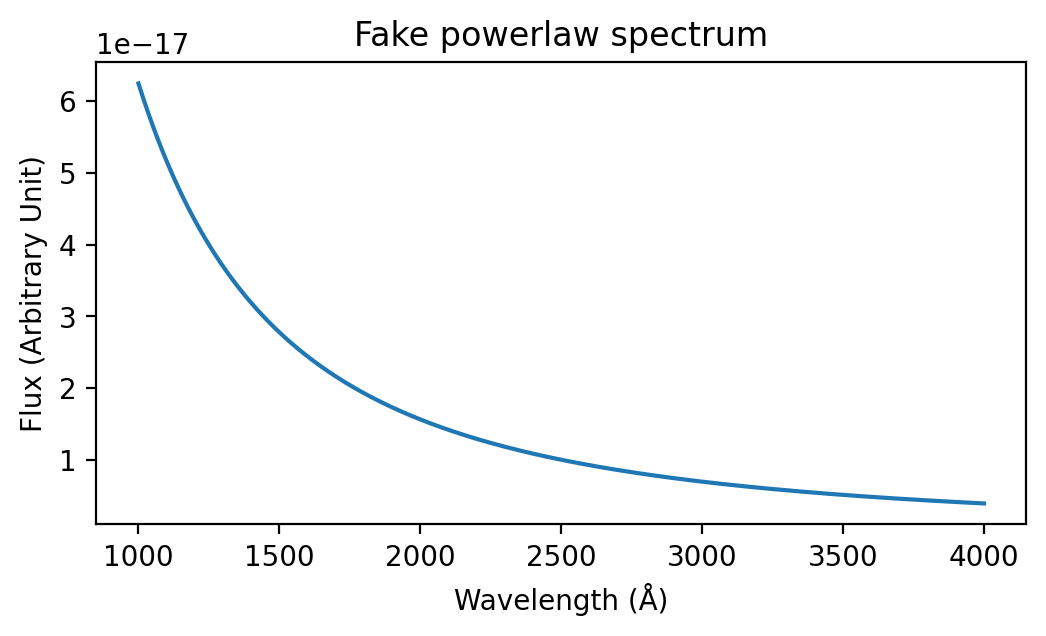

In [4]:
fig = plt.figure(figsize=(6,3))
plt.plot(wave, flux)
plt.title("Fake powerlaw spectrum")
plt.xlabel("Wavelength (Å)")
plt.ylabel(r"Flux (Arbitrary Unit)");

In [5]:
# Run spamm
spamm_out = spamm(complist=['PL'], inspectrum=(wave, flux, flux_err),
                  n_walkers=32, n_iterations=1000, parallel=False,
                  outdir="powerlaw_example", picklefile="powerlaw")

100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 220.00it/s]


[SPAMM]: Mean acceptance fraction: 0.519
[SPAMM]: Saved pickle file: powerlaw_example/powerlaw.pickle.gz
[SPAMM]: Execution time: 4.690 seconds


In [10]:
S = Samples("powerlaw_example/powerlaw.pickle.gz", outdir='powerlaw_example', burn=600)
plot_best_models(S)

[SPAMM]: Saved powerlaw_bestfits.png


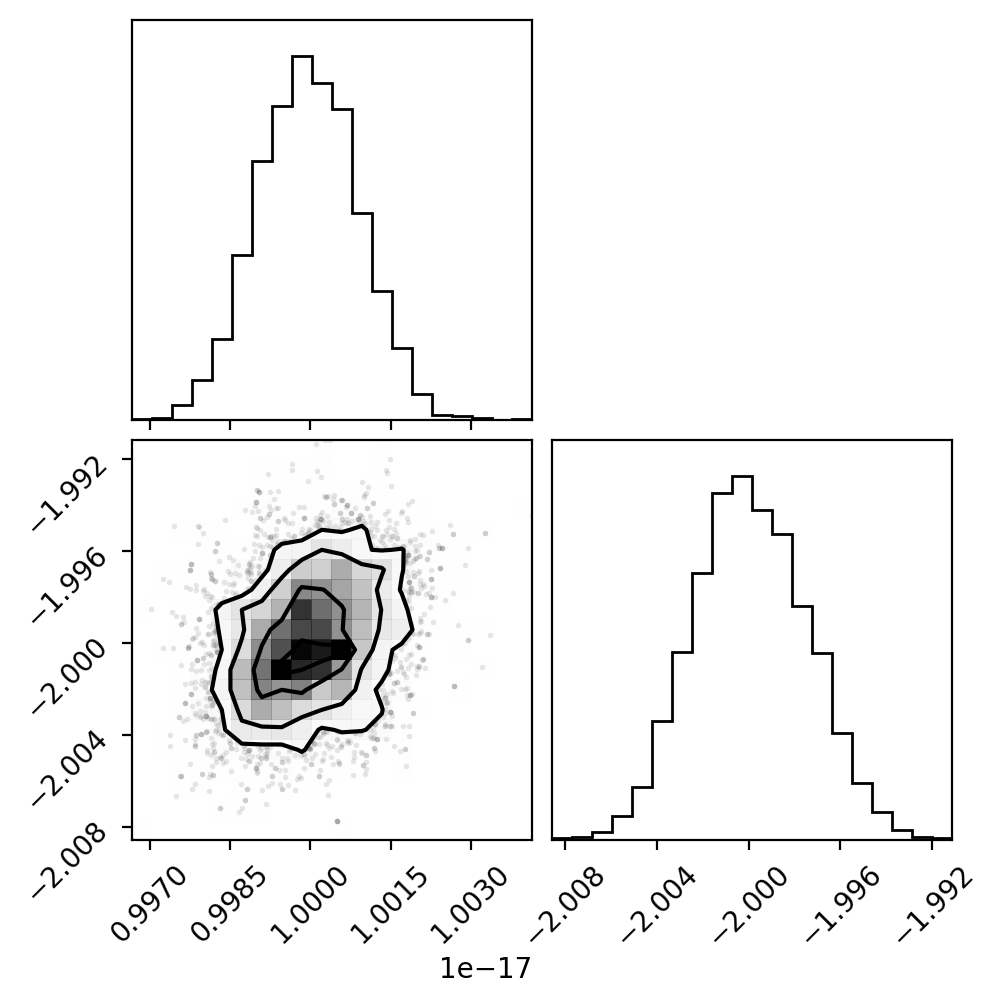

In [11]:
flat_samples = S.model.sampler.get_chain(discard=600, thin=2, flat=True)
fig = corner.corner(flat_samples);

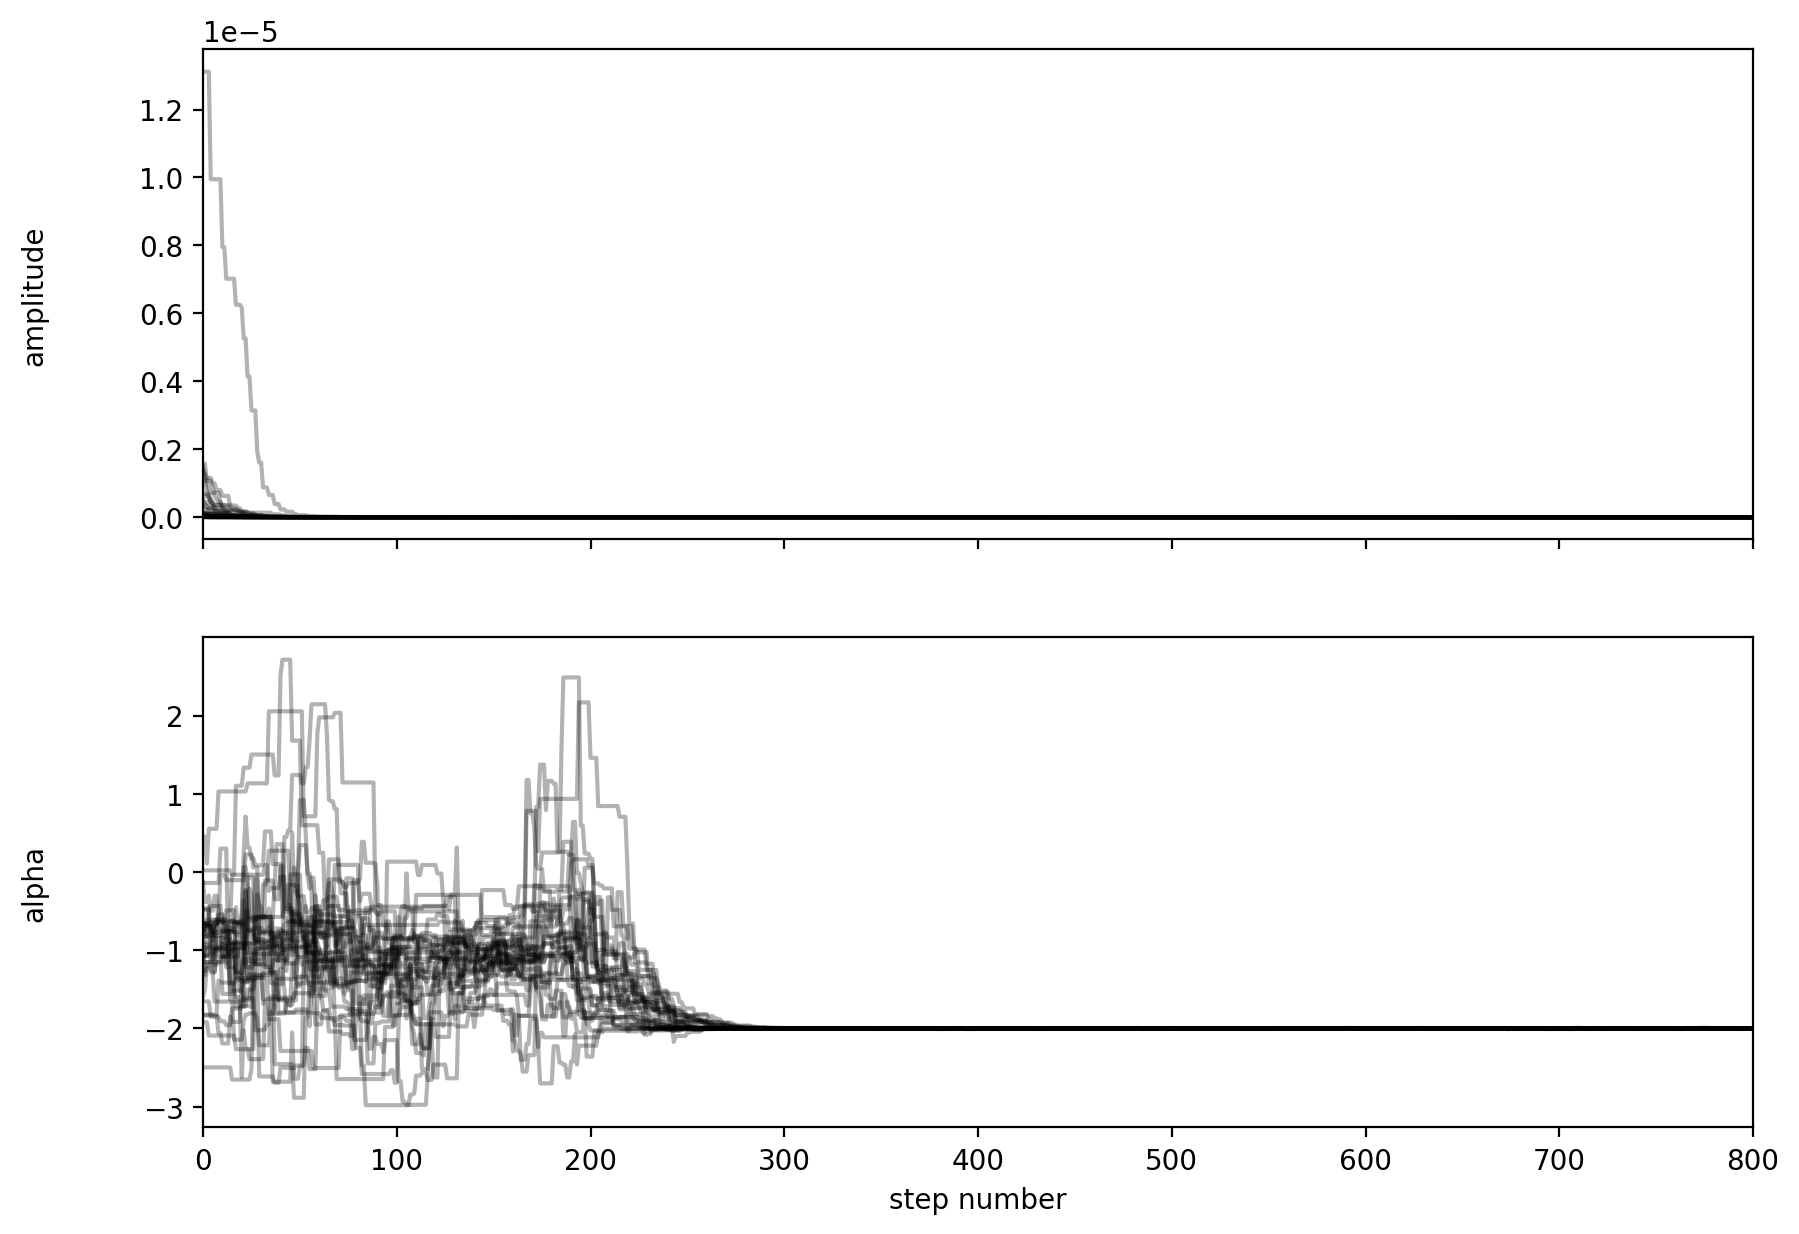

In [8]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = S.model.sampler.get_chain(discard=200)
#tau = S.model.sampler.get_autocorr_time()
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
axes[0].set_ylabel("amplitude")
axes[1].set_ylabel("alpha");

(-2000000.0, 200000.0)

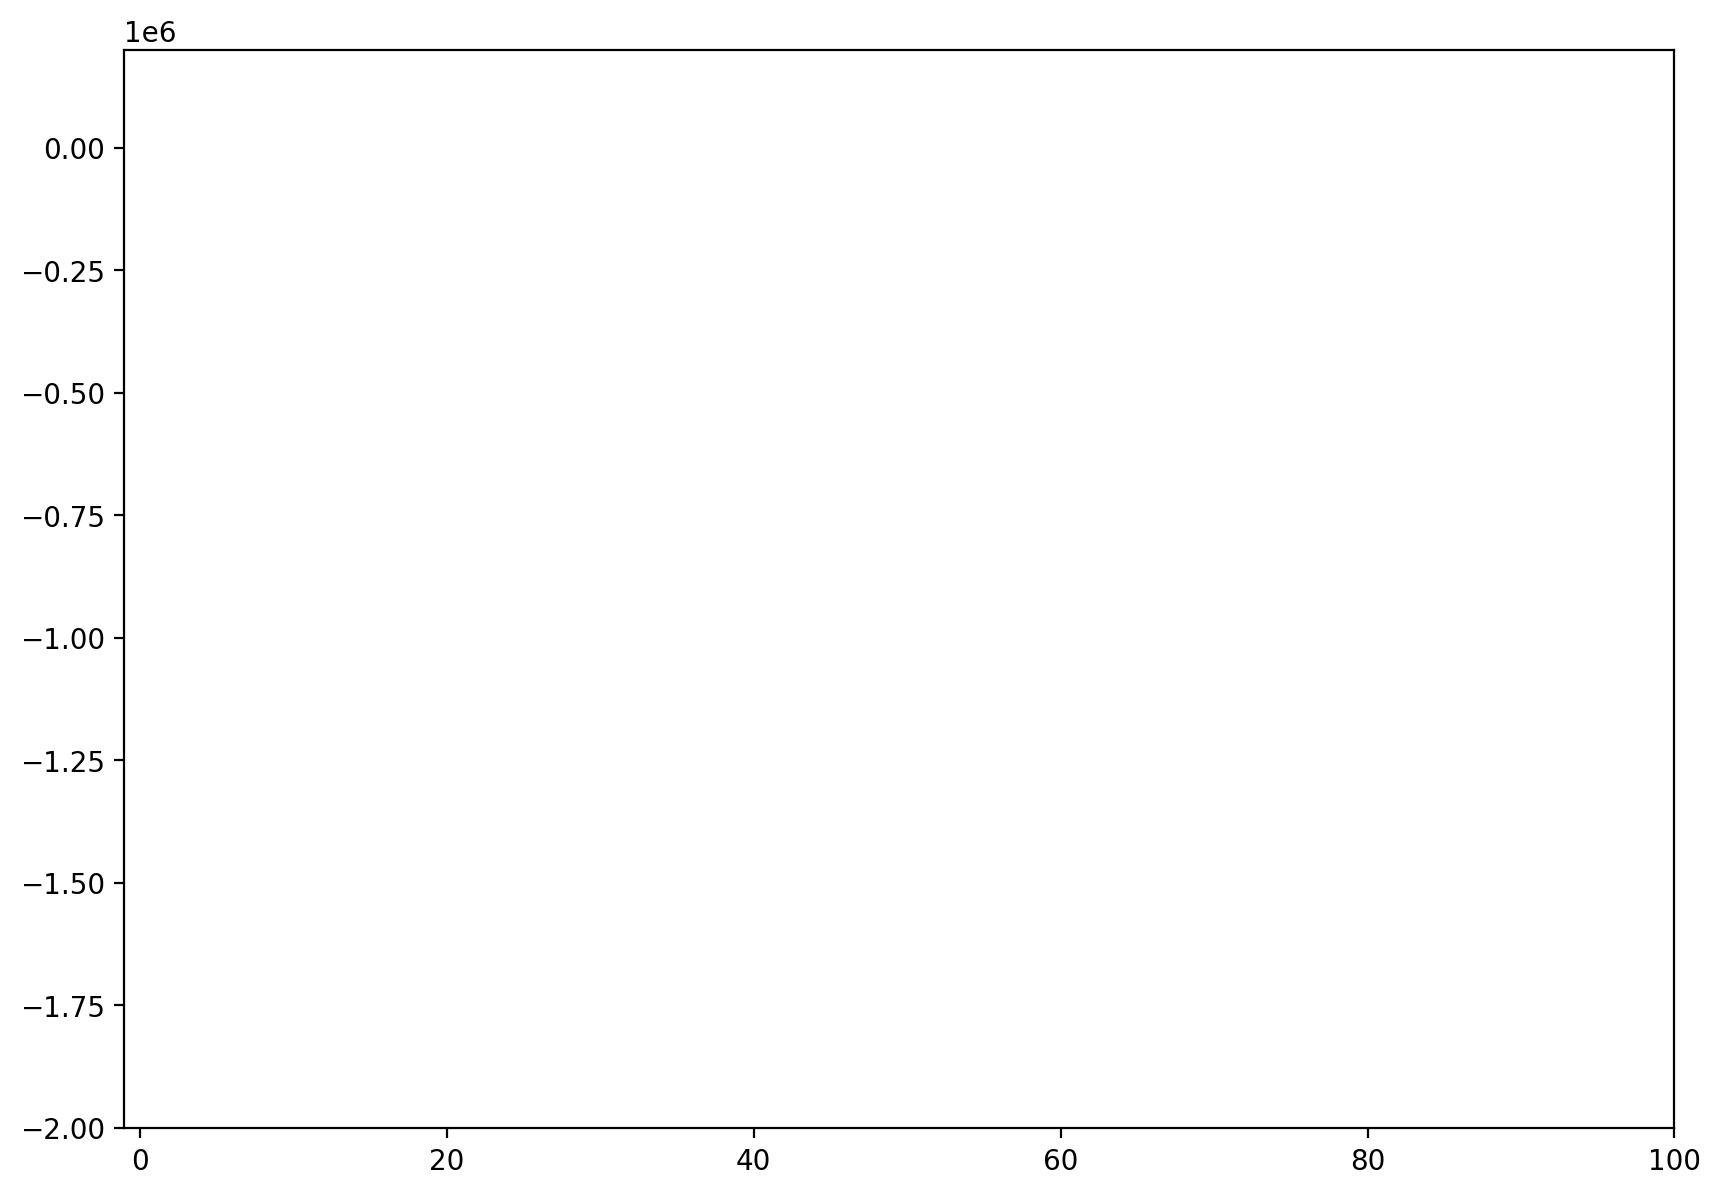

In [9]:
fig = plt.figure(figsize=(10, 7))
samples = S.model.sampler.get_log_prob()
plt.plot(samples[:,:]);
plt.xlim(-1, 100)
plt.ylim(-0.2e7,0.02e7)